### Importing necessary libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import *
import matplotlib.pyplot as plt

### Reading the dataset from csv file

In [2]:
data = pd.read_csv('./wine.csv')
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


### Scaling the data using sklearn's fit transform method

In [4]:
scalar = StandardScaler()
data['fixed acidity'] = scalar.fit_transform(data['fixed acidity'].values.reshape(-1,1))
data['volatile acidity'] = scalar.fit_transform(data['volatile acidity'].values.reshape(-1,1))
data['citric acid'] = scalar.fit_transform(data['citric acid'].values.reshape(-1,1))
data['residual sugar'] = scalar.fit_transform(data['residual sugar'].values.reshape(-1,1))
data['chlorides'] = scalar.fit_transform(data['chlorides'].values.reshape(-1,1))
data['free sulfur dioxide'] = scalar.fit_transform(data['free sulfur dioxide'].values.reshape(-1,1))
data['total sulfur dioxide'] = scalar.fit_transform(data['total sulfur dioxide'].values.reshape(-1,1))
data['density'] = scalar.fit_transform(data['density'].values.reshape(-1,1))
data['pH'] = scalar.fit_transform(data['pH'].values.reshape(-1,1))
data['sulphates'] = scalar.fit_transform(data['sulphates'].values.reshape(-1,1))
data['alcohol'] = scalar.fit_transform(data['alcohol'].values.reshape(-1,1))

In [6]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  quality  
0 -0.960246        5  
1 -0.58477

### Plotting the a graph for every feature versus the target 

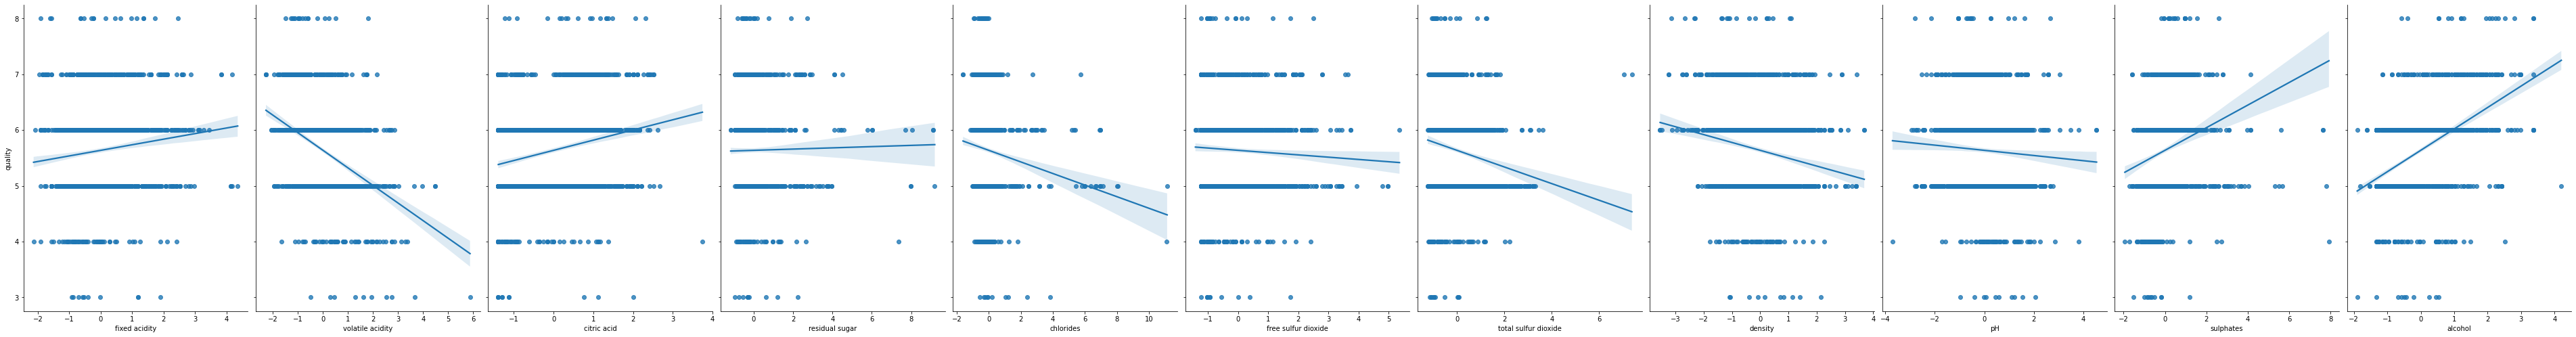

In [9]:
X = data.drop(columns='quality', axis=1)
Y = data['quality']

%matplotlib inline
sns.pairplot(data , x_vars=X.columns , y_vars='quality',height=7, aspect=0.7, kind='reg')

### Splitting the dataset for training and testing with the ratio of 7:3

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size=0.3, random_state=7)

### Running the Regressor Model for different values of K (1 to 80 to be specific)

In [36]:
mse = []
for i in range(1,80):
    model = KNeighborsRegressor(i)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    mse.append(mean_squared_error(Y_test,predictions))

### Printing the MSE for individual k values

In [37]:
print(mse)

[0.61875, 0.49166666666666664, 0.4747685185185185, 0.46796875, 0.4560833333333333, 0.44103009259259257, 0.4399659863945578, 0.4427408854166667, 0.4436471193415637, 0.4420208333333333, 0.4417527548209365, 0.43431712962962965, 0.43271696252465486, 0.4350233843537415, 0.43699074074074074, 0.4379069010416667, 0.4333549596309112, 0.4308577674897119, 0.42777585410895663, 0.4291197916666667, 0.42580782312925175, 0.42537017906336083, 0.42755198487712665, 0.42927155671296297, 0.42734, 0.4269292406311637, 0.4274977137631458, 0.4268946641156462, 0.4294862267142291, 0.42978935185185185, 0.4297346514047867, 0.4303466796875, 0.4271770737679829, 0.42755730968858136, 0.42653061224489797, 0.4274369855967078, 0.4260896031166302, 0.424743190212373, 0.42420008766162615, 0.4233671875, 0.4232785544318858, 0.4217816987906273, 0.42341017667207503, 0.42336324896694216, 0.42261419753086416, 0.42249724322621296, 0.4221687792364569, 0.4210340711805555, 0.4208879980563654, 0.42062499999999997, 0.42182173523003974,

### Printing the minimum MSE and the corresponding k value for which we got the MSE

In [38]:
print(min(mse),mse.index(min(mse)))

0.42059417517006803 55


### Plotting a graph to show to show the lowest mse for a particular k value

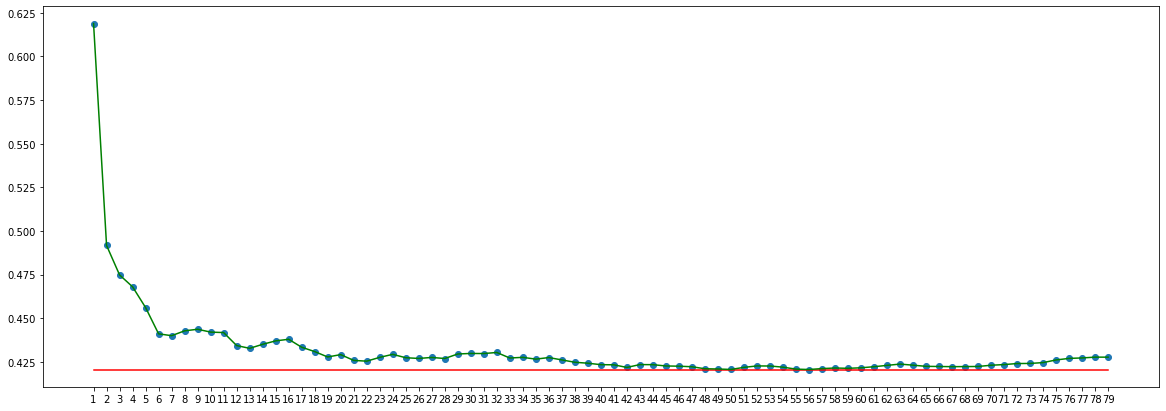

In [48]:
plt.figure(figsize=(20, 7))
plt.xticks(np.arange(1,80,step=1))
plt.plot(np.arange(1,80, step=1), np.full((79,1),min(mse)), color='red')
plt.scatter(np.arange(1,80,step=1), mse)
plt.plot(np.arange(1,80,step=1), mse, color='green')
plt.show()

### Inference
- The KNN regressor classifies better for this dataset if k's value is equal to 56.